In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

*Exercise 1:*
1. Load data as a vector x = (x1, . . . , xn) of nuclear accident costs before the Three Mile Island accident and remove all missing values. You must get n = 55 observations.

In [2]:
data = pd.read_csv('data/C_id_35_NuclearPowerAccidents2016.csv', sep=',') #Get data
data["Date"] = pd.to_datetime(data["Date"])
data = data[data.Date<'1979-03-28']  #Get data before Three Mile Island accident
data = data.loc[data['Cost (millions 2013US$)'].notnull()] #Remove null values
print(data.shape)
data.head()

(55, 8)


,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
4,1957-09-11,"Rocky Flats, USA",8189.0,5.0,5.2,NaN,Fire starts and destroys plutonium processing ...,0
5,1955-03-25,"Sellafield, UK",4400.0,4.0,4.3,WE,Fire releases up to up to a few tenths of a te...,0
6,1977-01-01,"Beloyarsk, USSR",3500.0,5.0,NaN,EE,"Unit 2 suffers a half core meltdown, repairs t...",0
7,1955-07-14,"Sellafield, UK",2900.0,3.0,-2.4,WE,Another radioactive leak and remediation opera...,0
8,1969-10-12,"Sellafield, UK",2500.0,4.0,2.3,WE,Enhanced discharge from the Building B204 stac...,0


2. Let F <sub>θ </sub> be the cumulative distribution function of a Gaussian distribution with mean µ
and variance σ<sup>2</sup> , with θ = (µ, σ<sup>2</sup> ).

(a) Show that the quantile function F<sub>θ</sub><sup>-1</sup> satisfies:
$$\forall p \in (0,1), F_θ^{-1}(p) = σF_{(0,1)}^{-1}(p) + µ$$

The quantile function is the inverse of the cumulative distribution function, so we will need the CDF of a normal distribution, given by:

$$F_θ(x) = \frac{1}{2} + [1 + erf(\frac{(x - µ)}{σ \sqrt(2)})]$$


Calculating the inverse of the CDF (Quantile), step by step, we get:

$$F_θ^{-1}(p) = \frac{1}{2} + [1 + erf(\frac{(x - µ)}{σ \sqrt(2)})]$$





(b) Show the Q–Q plot of data for the Gaussian model using the probplot function of
SciPy.


Where erf is the error function, given by:

$$erf(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2}dt$$

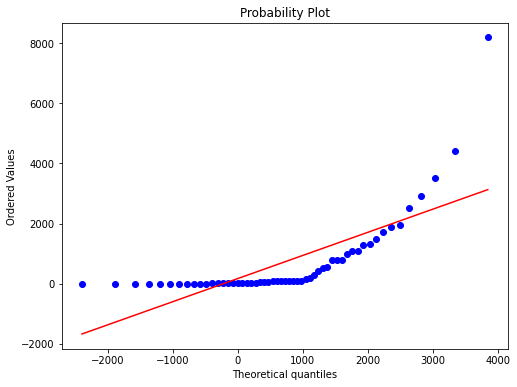

In [3]:
y = data['Cost (millions 2013US$)']  #Target variable
norm = stat.norm.fit(y) #Fit normal distribution to target variable
plt.figure(figsize=(8,6)) 
stat.probplot(y, dist="norm", plot=plt, sparams=norm) #Plot Q-Q plot of target variable against normal distribution
plt.show()

3. Let  F <sub>θ </sub> be the cumulative distribution function of an exponential distribution with pa-
rameter θ > 0.

(a) Show that the quantile function F<sub>θ</sub><sup>-1</sup> satisfies:

$$\forall p \in (0,1), F_θ^{-1}(p) = \frac{1}{θ} F_1^{-1}(p)$$


(b) Show the Q–Q plot of data for the exponential model.

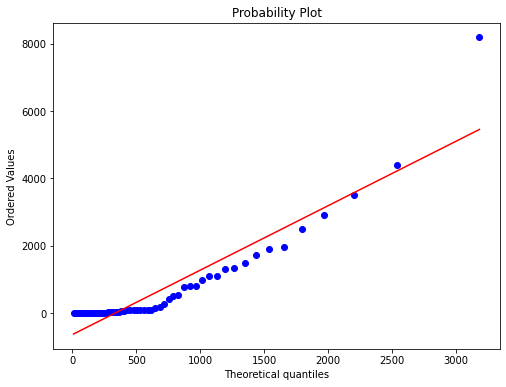

In [7]:
exp = stat.expon.fit(y) #Fit exponential distribution to target variable
plt.figure(figsize=(8,6)) 
stat.probplot(y, dist="expon", plot=plt, sparams=exp) #Plot Q-Q plot of target variable against exp distribution
plt.show()

4. The Q-Q plot tries to determine from which distribution the data came from. The plot is a scatter plot of the quantiles of the data against the quantiles of the candidate distribution. If the data did come from the distribution, the points should lie on a straight line, 45 degrees from the origin.
Therefore, analysing the two plots, we can see that the data is more likely to come from an exponential distribution than an normal distribution, since the plot of the exponential distribution is much closer to the 45 degree line than the plot of the normal distribution, which is more spread out.

In the following, we use the exponential model for the cost of accidents before the
Three Mile Island accident. Specifically, we assume that accident costs are i.i.d. samples of
an exponential distribution with parameter θ > 0. Let Θ = (0, +∞) be the set of parameters.
We denote by X = (X1 , . . . , Xn ) a random vector of n i.i.d. samples.

*Exercise 2 (Point estimation):*

We first focus on the estimation of θ or some functions of θ.

1. Give the maximum likelihood estimator θ̂ of θ.

The PDF of an exponential distribution is given by: 
$$y = \lambda e^{-\lambda x}$$
Therefore, the likelihood function is given by:
$$L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum_{i=1}^{n} x_i}$$
Taking the log of the likelihood function, we get:
$$\log L(\lambda) = n \log \lambda - \lambda \sum_{i=1}^{n} x_i$$
Taking the derivative of the log likelihood function with respect to $\lambda$, we get:
$$\frac{\partial \log L(\lambda)}{\partial \lambda} = \frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0$$
Therefore, the MLE is given by:
$$\hat{\lambda} = \frac{n}{\sum_{i=1}^{n} x_i}$$
That is, the inverse of the avarage. Given by the following code:

In [22]:
lam = 1/y.mean() #Get lambda for exponential distribution
print ("MLE of lambda: " + str(lam))

MLE of lambda: 0.0013767725947156965


2. Show on the same plot the histogram of data in density and the probability densityfunction of the exponential distribution with parameter θ̂(x).

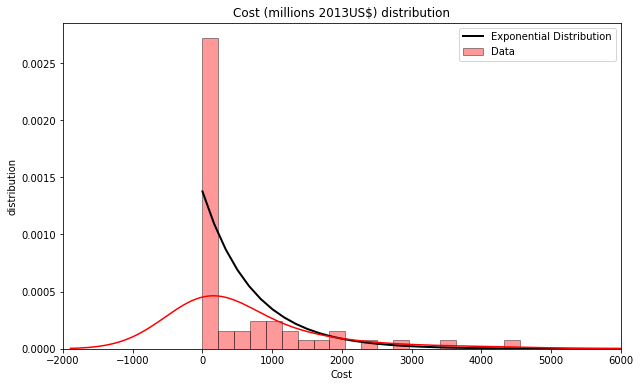

In [89]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', UserWarning)

range_var = np.linspace(y.min(),y.max())
plt.figure(figsize=(10,6))
exp_y = lam* np.exp(-(lam*range_var)) #Get exponential distribution
plt.plot(range_var,exp_y, color='black', label='Exponential Distribution', linewidth=2)

#plot histogram and density of data
sns.distplot(y, hist=True, kde=True,
                bins=int(180/5), color = 'red',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 1.5}, label='Data')



plt.title('Cost (millions 2013US$) distribution')
plt.legend()
plt.xlabel('Cost')
plt.ylabel('distribution')
#limit x axis from 0
plt.xlim(-2000,6000)
plt.show()


3. We seek to estimate the expected cost:
$$g(θ) = \frac{1}{\theta}$$
Let:
$$\hat{g}(x) = \frac{1}{n}\sum\limits_{i=1}^{n}X_i$$
Show that ĝ is an efficient estimator of g(θ).


Knowing that a unbiased estimator that reaches the Cramer-Rao lower bound is an efficient estimator, we can say that $\hat{g}(x)$ is an efficient estimator if it reaches the Cramer-Rao lower bound. Since the Cramer-Rao lower bound is given by:
$$Var_{\theta}|S(x)|\geq \frac{g'(\theta)^2}{I(\theta)}$$
To be unbiased, we need:
$$E_{\theta}|\hat{g}(x)| = \frac{1}{\theta}$$
Therefore, we get:
$$E(\frac{1}{n}\sum\limits_{i=1}^{n}X_i) = \frac{1}{\theta}$$
$$\frac{1}{n}\sum\limits_{i=1}^{n}E(X_i) = \frac{1}{\theta}$$
$$\frac{1}{n}\sum\limits_{i=1}^{n}\frac{1}{\theta} = \frac{1}{\theta}$$
$$\frac{1}{n}\sum\limits_{i=1}^{n}1 = \frac{1}{\theta}$$
$$\frac{1}{n}n = \frac{1}{\theta}$$
$$1 = \frac{1}{\theta}$$
$$\theta = 1$$
Therefore, $\hat{g}(x)$ is an unbiased estimator of $g(\theta)$, and we can say that it is an efficient estimator.

*Exercise 3*

1. Give the null hypothesis $H_0$ and the alternative hypothesis $H_1$ as subsets of Θ.

Being $T(X) = \sum_{i=1}^n Xi $ a scalar statistic, where $X_i$ is each sample:

Since there is a total of 55 accidents, it is possible to conclude that affirming that the average cost of an accident is inferior to 1 billion dolars is the same as affirming that $T(X)$ is inferior than 55 billion dolars.

Therefore, the hypotheses are:

$$H_0: T(X)\geq 55 \cdot 10^9 dollars $$
$$H_1: T(X)< 55 \cdot 10^9 dollars $$

2. Using Neyman-Pearson’s approach, give a uniformly most powerful test at level α.



Being $Z_{\theta, \theta'}(X)$ the likelihood ratio, we have:




$$ Z_{\theta, \theta'} (X) = \dfrac{\theta'^n  e^{-\theta' \sum_{i=1}^n Xi}}{\theta^n e^{-\theta \sum_{i=1}^n Xi}} 
= \dfrac{\theta'^n e^{-\theta' T(X)}}{\theta^n e^{-\theta T(X)}}
= \left(\dfrac{\theta'}{\theta}\right)^n  e^{(\theta - \theta') T(X)}
$$

Therefore, $Z_{\theta, \theta'}$ is a strictly decreasing function of $T(X)$ $\forall$ $\theta, \theta' | (\theta' > 0  ,  \theta>0)$,which verifies the MON condition explained in the section 5.5 of the poly.

Using the theorem presented in the theorem 5.5.2 of the poly, it is possible to adapt the increasing function shown in the poly to the case of our monotonic decreasing function $Z_{\theta, \theta'}$. Therefore, we have:

Being $\theta_0 \in \Theta, \alpha \in (0,1)$ and $ c $ | $P_{\theta_0} (T(X) < c) = \alpha$

This way, the hypothesis $H_0 = {\theta \geq \theta_0}$ against the alternative $H_1 = {\theta < \theta_0}$ defined by:
$$
\begin{equation*}
    \delta(x) = \begin{cases}
               1               & \text{si } T(X) < c\\
               0               & \text{si } T(X) \geq c\\
           \end{cases}
\end{equation*}
$$
Is uniformly most powerful at level $\alpha$.

That said, the sum of n independent exponential random variables identically distributed with parameter $\lambda$ is a random variable with a Gamma distribution with parameters $k = n$ and $\theta = \lambda^{-1}$.

3. Apply the test at level α = 5%. Give the p-value and conclude.

In [16]:
pvalue = stat.gamma.cdf(x=sum(y), a=len(y), scale=1000)
print('p-value: ' + str(pvalue))

p-value: 0.013717486423264867


Therefore, it is not possible to conclude that the average cost of an accidenthe is inferior to 1 billion dolars, since the samples can always have a mean distant from the distribution's mean, so $H_0$ can be rejected.

If $H_0$ is not rejected, there is a chance equivalent to the p-value shown above to observe T(X) in question, so $H_0$ will be rejected, since $\alpha$ is equal to 0.05.

4. For n = 55 samples and the parameter θ associated with an expected cost of one billion
dollars, plot the probability density function of ĝ(X) and show the rejection region of
$H_0$ at level α = 5%.

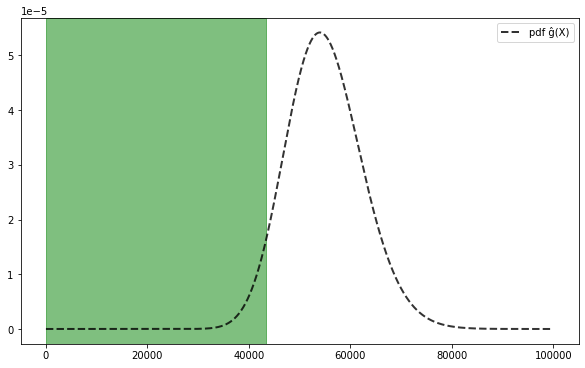

Rejection threshold: 43395.81385987552


In [32]:
x_alpha = stat.gamma.ppf(q=0.05, a=y.shape[0], scale=1000)
ax_x = list(range(0, 100000))
ax_x = [i for i in ax_x]
ax_y = stat.gamma.pdf(x=ax_x, a=y.shape[0], scale=1000)

plt.figure(figsize=(10,6))
plt.plot(ax_x, ax_y, color='black', label='pdf ĝ(X)', linewidth=2, alpha=.8, linestyle='--')
plt.axvspan(0, x_alpha, alpha=0.5, color='green')
plt.legend()
plt.show()
print ('Rejection threshold: ' + str(x_alpha))

5. Plot the power of the test at level α with respect to θ for n = 10, 50, 100, 1000 samples.
Explain the results.

TypeError: 'Text' object is not callable

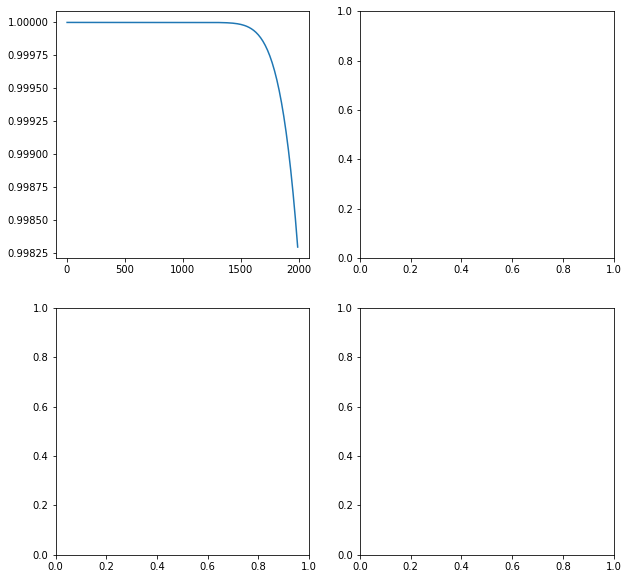

In [56]:
thetas = list(range(1, 2000, 10))
n = [10, 50, 100, 100]
fig, ax = plt.subplots(2,2 , figsize=(10, 10))
ax[0,0].plot(thetas, stat.gamma.cdf(x=x_alpha, a=10, scale=thetas))
ax[0,0].title ('n = 10')
ax[0,1].plot(thetas, stat.gamma.cdf(x=x_alpha, a=50, scale=thetas))
ax[0,1].title ('n = 50')
ax[1,0].plot(thetas, stat.gamma.cdf(x=x_alpha, a=100, scale=thetas))
ax[0,1].title ('n = ' +str(n))
ax[1,1].plot(thetas, stat.gamma.cdf(x=x_alpha, a=1000, scale=thetas))
ax[1,1].title ('n = ' +str(n))


In [13]:
x_alpha

43395.81385987552

In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', UserWarning)

range_var = np.linspace(y.min(),y.max())
plt.figure(figsize=(10,6))
exp_y = lam* np.exp(-(lam*range_var)) #Get exponential distribution
plt.plot(range_var,exp_y, color='black', label='Exponential Distribution', linewidth=2)

#plot histogram and density of data
sns.distplot(y, hist=True, kde=True,
                bins=int(180/5), color = 'red',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 1.5}, label='Data')



plt.title('Cost (millions 2013US$) distribution')
plt.legend()
plt.xlabel('Cost')
plt.ylabel('distribution')
#limit x axis from 0
plt.xlim(-2000,6000)
plt.show()


In [33]:
a.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [5]:
from scipy import stats
v = data['Cost (millions 2013US$)']
x = stats.probplot(v)

In [8]:
x = np.array(x)
x

array([(array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
       -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
       -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
        0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
        0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]), array([0.00000e+00, 9.00000e+00, 3.00000e+01, 3.34000e+01, 4.28000e+01,
       5.14000e+01, 5.50000e+01, 8.45000e+01, 8.70000e+01, 8.99000e+01,
       9.80000e+01, 1.00000e+02, 1.00000e+02, 1.50000e+02, 1.80000e+02,
       9.90000e+02, 1.30000e+03, 1.33000e+03, 1.73340e+03, 1.90000e+03,
       2.50000e+03, 2.90000e+03, 4.40000e+03, 1.66089e+05, 2.59336e+05])),
       (34710.126447473245, 17743.575999999994, 0.5515397358064319)],
      dtype=object)

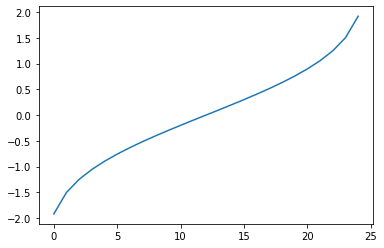

In [28]:
plt.plot(x[0][0])

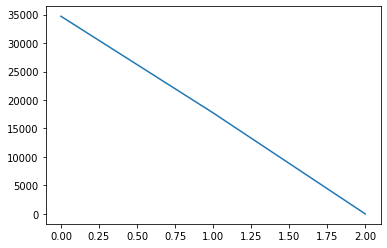

In [ ]:
plt.plot(x[1])